# Libraries

In [82]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler


import numpy as np
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics.pairwise import polynomial_kernel
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Version

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Dataset

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

In [4]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

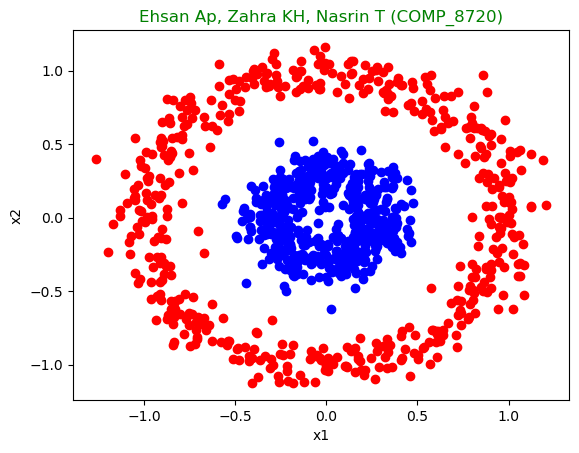

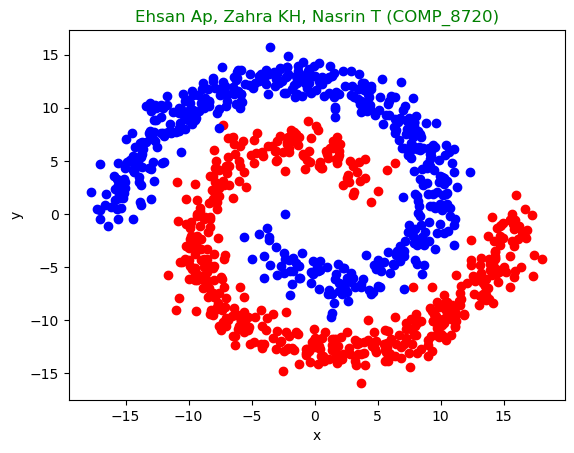

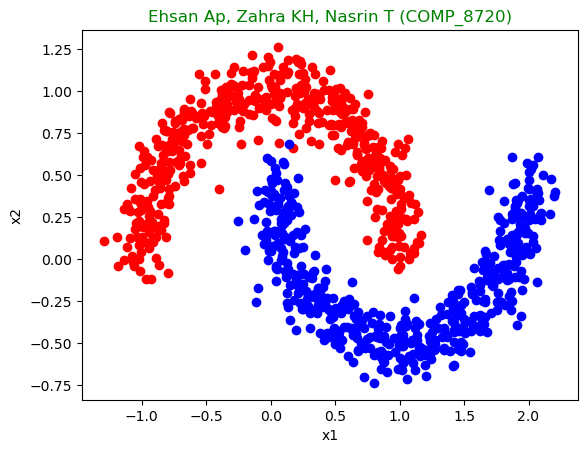

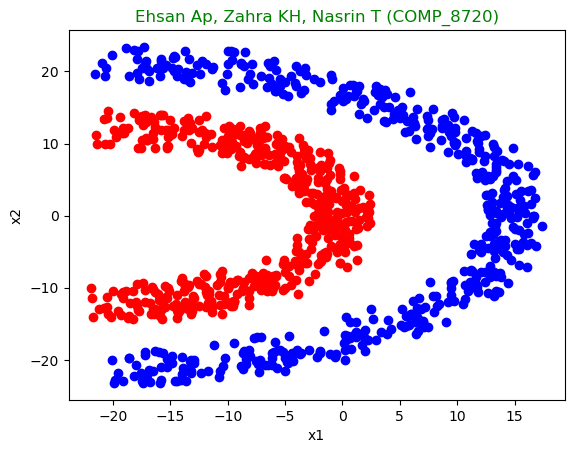

In [5]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [70]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))

def calculate_wcss(X, y):
    wcss = 0
    for k in np.unique(y):
        mask = y == k
        centroid = np.mean(X[mask], axis=0)
        distance = np.sum((X[mask] - centroid) ** 2)
        wcss += distance
    return wcss

def calculate_i_index(X, y):
    wcss = calculate_wcss(X, y)
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(y))
    s = 1 - silhouette_score(X, y)
    if n_clusters > 1:
        return s * np.sqrt(wcss / (n_samples * (n_clusters - 1)))
    else:
        return np.nan

# Circle

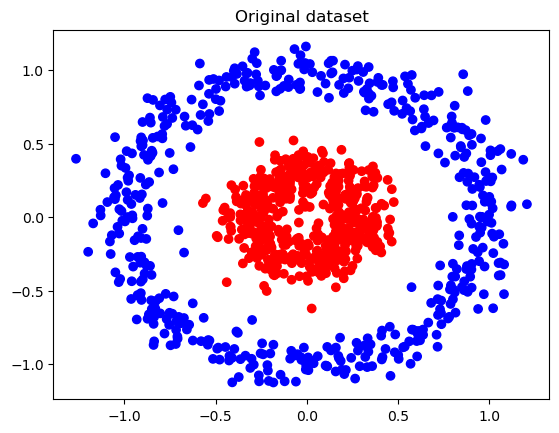

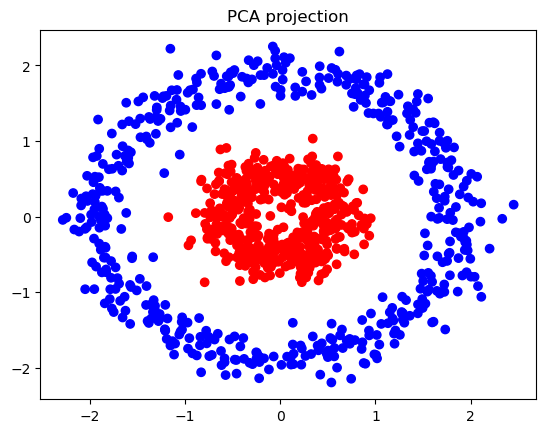

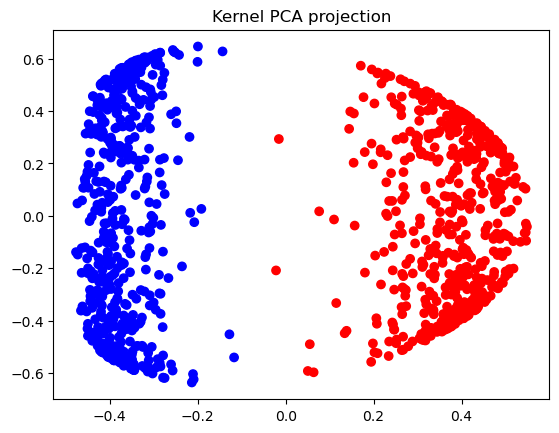

In [64]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection')
plt.show()

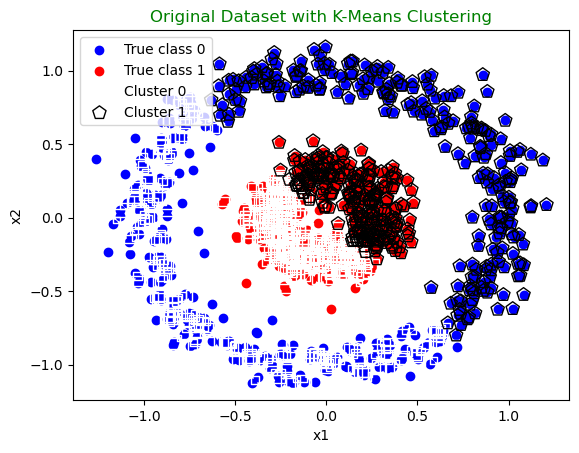

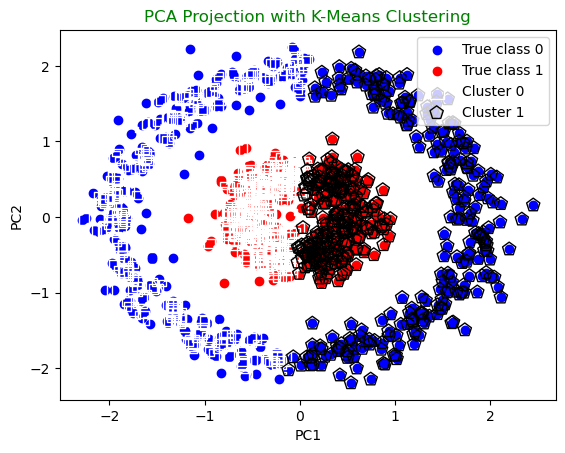

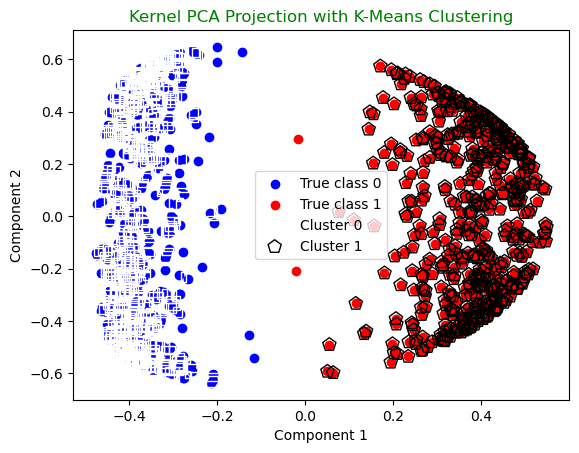

In [63]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means Clustering", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA Projection with K-Means Clustering", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("Kernel PCA Projection with K-Means Clustering", color='green')
plt.show()

In [69]:
data = circle_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.309682     0.885971
1    Calinski-Harabasz  461.343708  1033.502329
2           Silhouette    0.290228     0.514921
3  Adjusted Rand Index   -0.001002     0.992008
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.830081     0.176207


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Moons

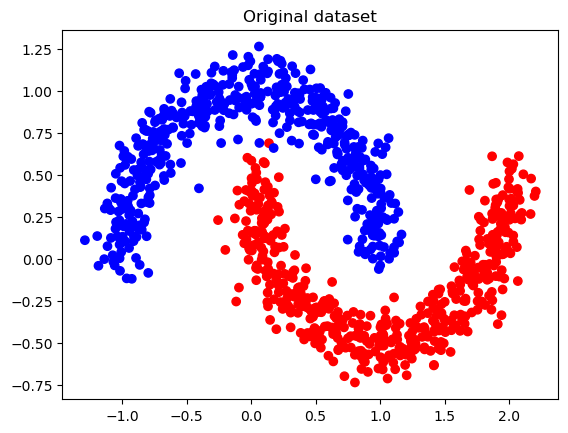

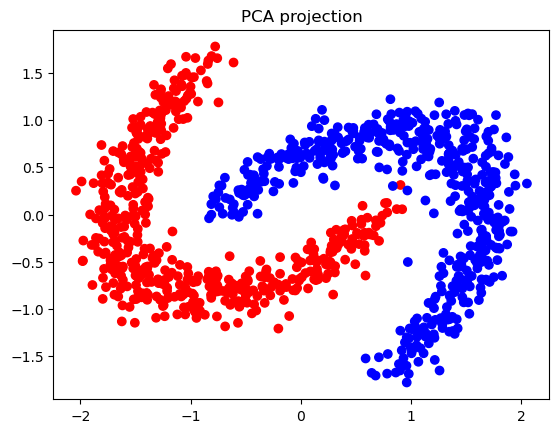

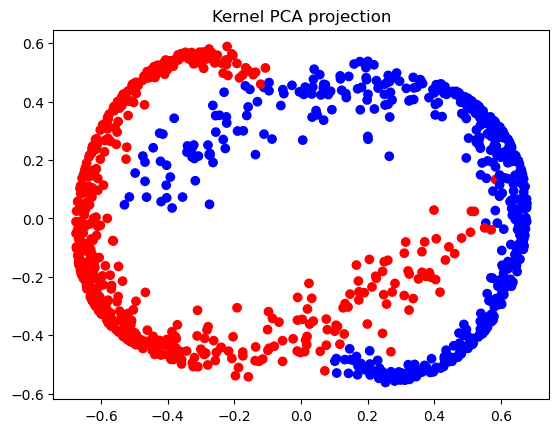

In [72]:
moons_csv = moons_csv

X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection')
plt.show()

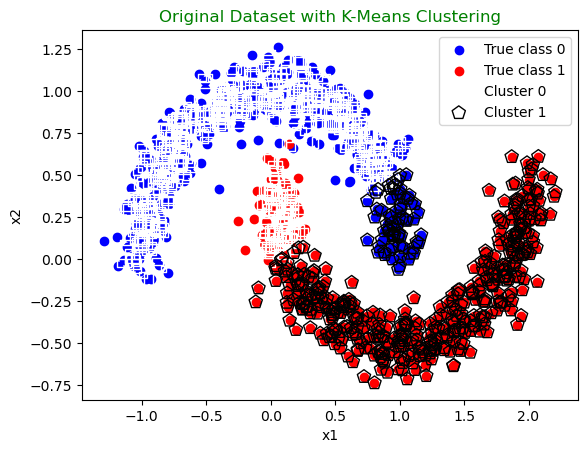

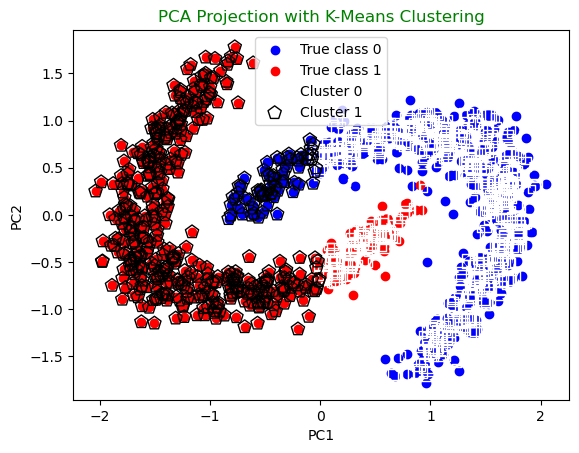

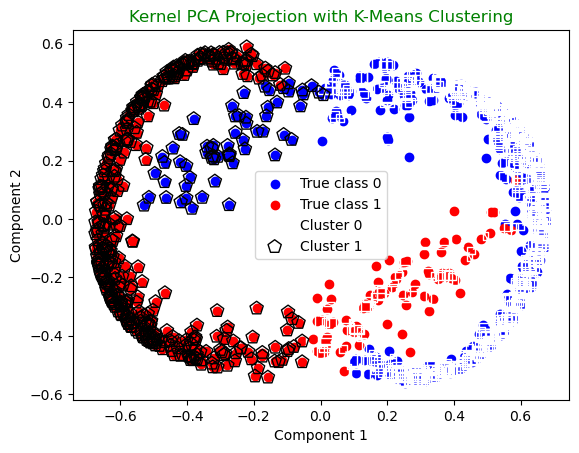

In [73]:
moons_csv = moons_csv

X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means Clustering", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA Projection with K-Means Clustering", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("Kernel PCA Projection with K-Means Clustering", color='green')
plt.show()

In [74]:
data = moons_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric          PCA   Kernel PCA
0       Davies-Bouldin     0.816856     0.841996
1    Calinski-Harabasz  1346.593923  1252.323886
2           Silhouette     0.488802     0.505911
3  Adjusted Rand Index     0.486690     0.523700
4       Xie-Beni Index     0.001000     0.001000
5              Index I     0.471668     0.197588


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Spiral

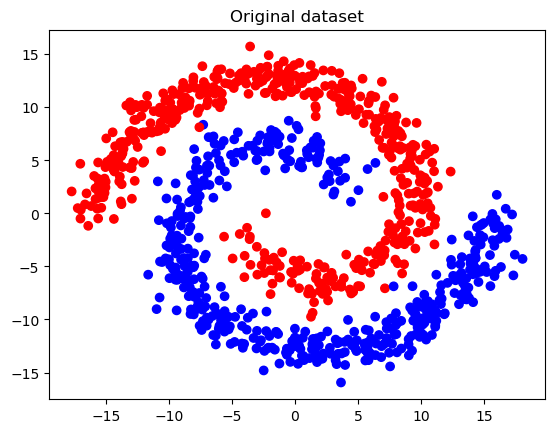

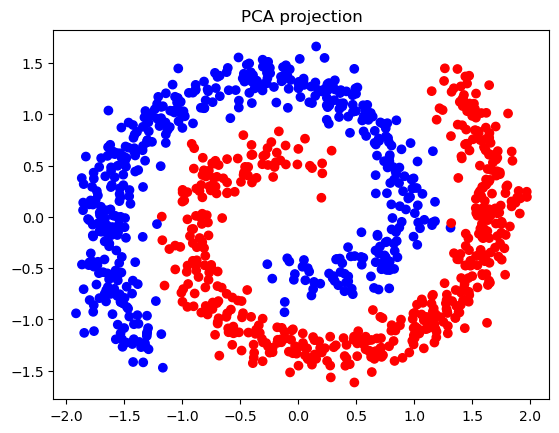

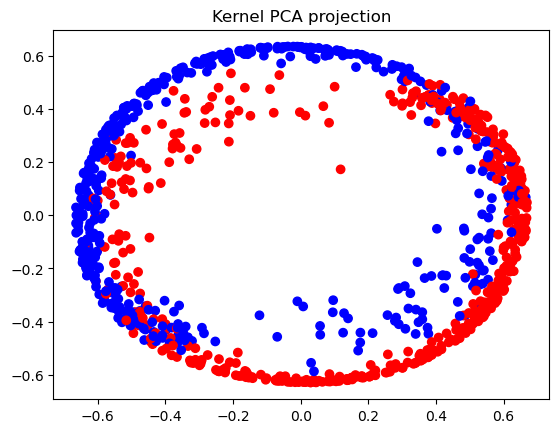

In [75]:
spiral_csv = spiral_csv

X = spiral_csv[['x', 'y']]
y = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection')
plt.show()

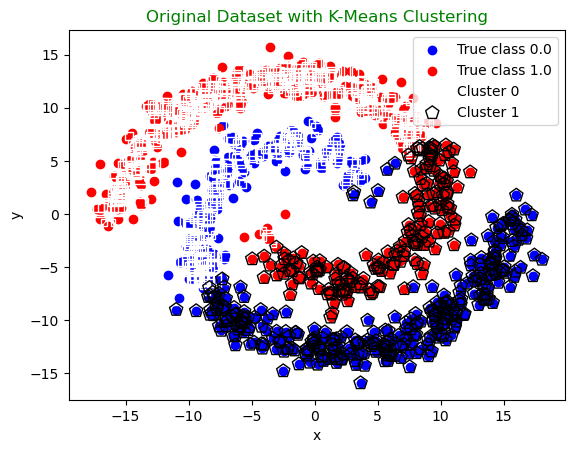

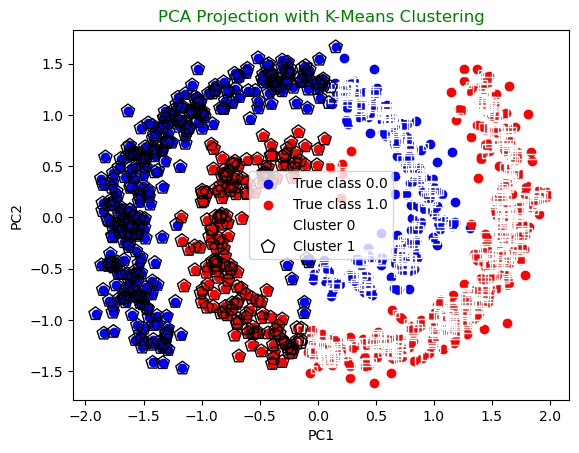

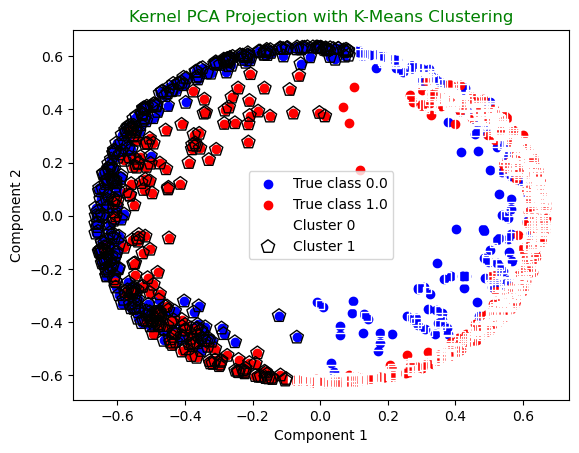

In [76]:
spiral_csv = spiral_csv

X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Original Dataset with K-Means Clustering", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA Projection with K-Means Clustering", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("Kernel PCA Projection with K-Means Clustering", color='green')
plt.show()

In [77]:
data = spiral_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    0.949054    0.963431
1    Calinski-Harabasz  956.888294  923.864099
2           Silhouette    0.436351    0.464943
3  Adjusted Rand Index    0.084347    0.149693
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.569545    0.236034


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Halfkernel

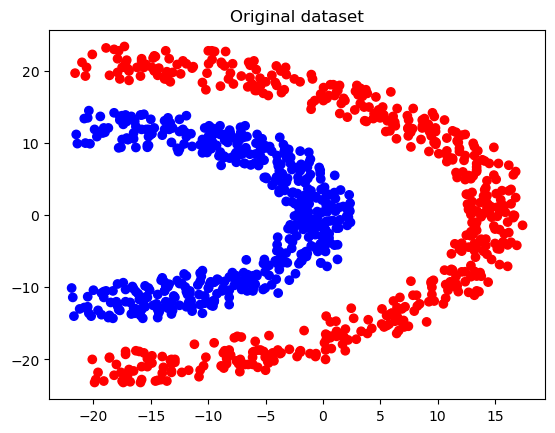

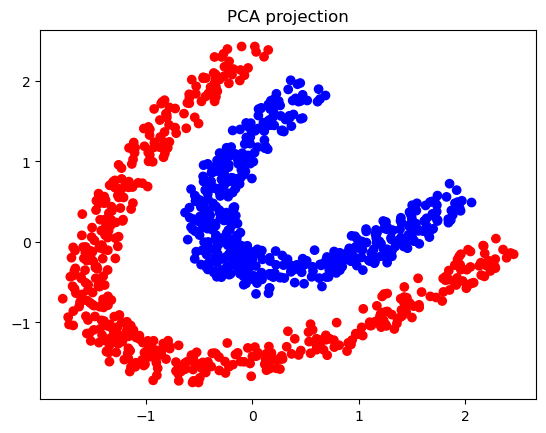

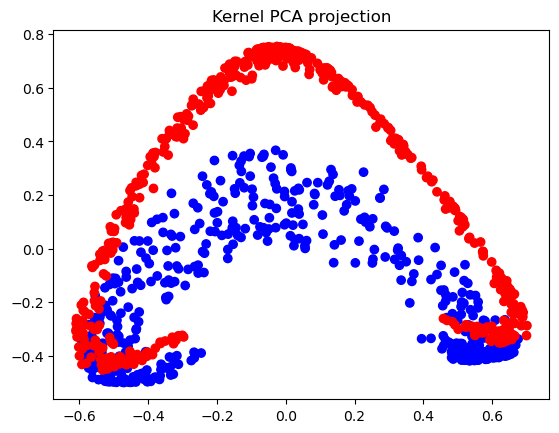

In [78]:
halfkernel_csv = halfkernel_csv

X = halfkernel_csv[['x1', 'x2']]
y = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection')
plt.show()

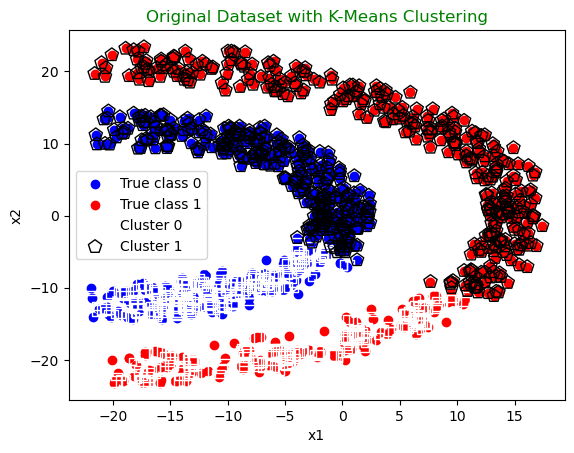

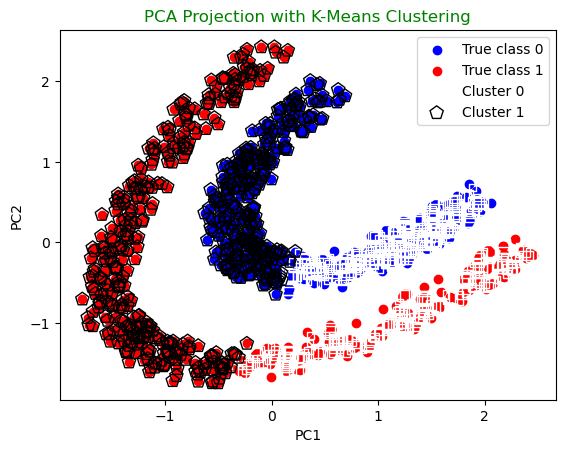

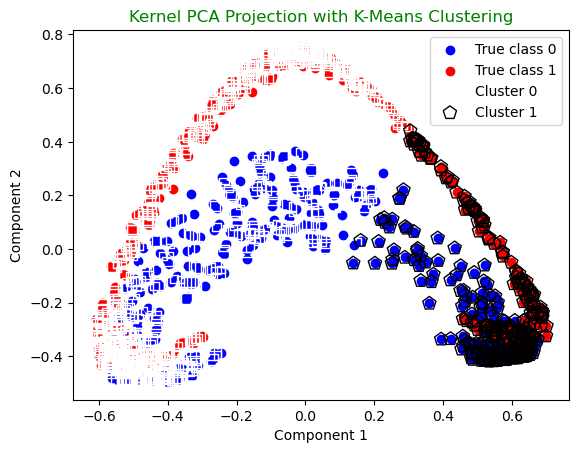

In [79]:
halfkernel_csv = halfkernel_csv

X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means Clustering", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA Projection with K-Means Clustering", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("Kernel PCA Projection with K-Means Clustering", color='green')
plt.show()

In [80]:
data = halfkernel_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    1.024780    0.832573
1    Calinski-Harabasz  629.925850  828.010429
2           Silhouette    0.385213    0.475486
3  Adjusted Rand Index    0.000116    0.003203
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.680750    0.227332


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Applying On S_Shape and Swiss_Role

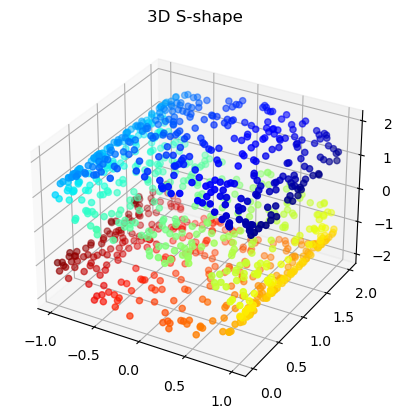

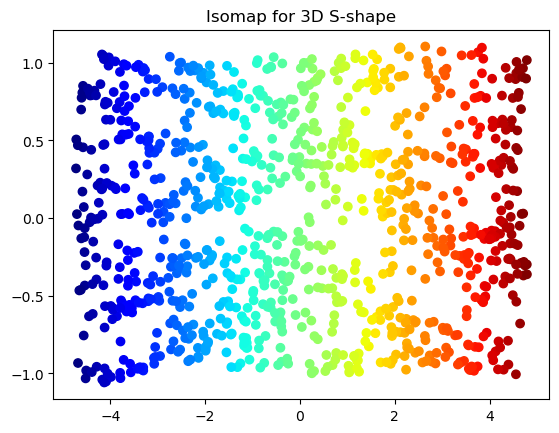

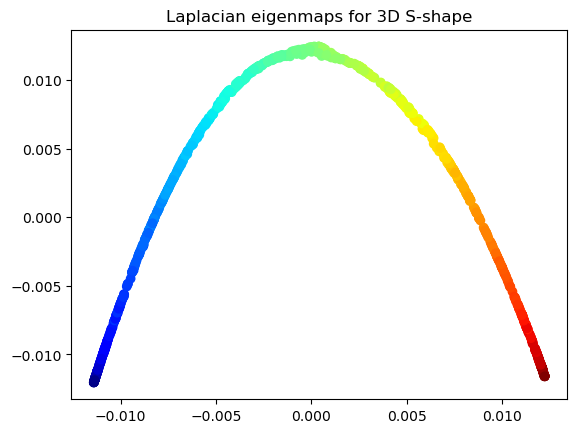

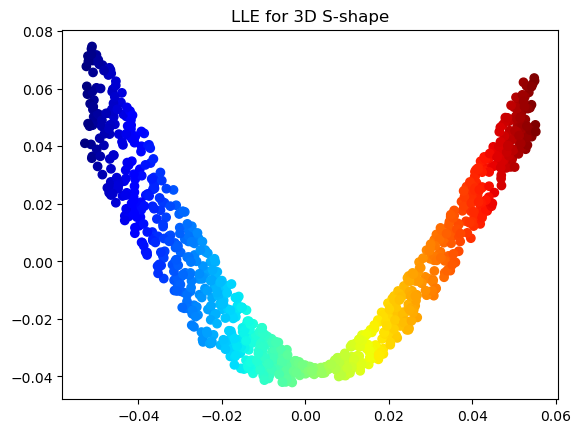

In [90]:
X_s_shape, y_s_shape = make_s_curve(n_samples=1000, random_state=0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_s_shape[:, 0], X_s_shape[:, 1], X_s_shape[:, 2], c=y_s_shape, cmap='jet')
ax.set_title('3D S-shape')
plt.show()

n_neighbors = 15
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X_s_shape)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_s_shape, cmap='jet')
plt.title('Isomap for 3D S-shape')
plt.show()

laplacian = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_lap = laplacian.fit_transform(X_s_shape)
plt.scatter(X_lap[:, 0], X_lap[:, 1], c=y_s_shape, cmap='jet')
plt.title('Laplacian eigenmaps for 3D S-shape')
plt.show()

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X_s_shape)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_s_shape, cmap='jet')
plt.title('LLE for 3D S-shape')
plt.show()

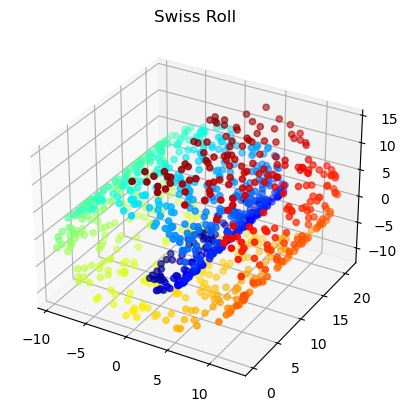

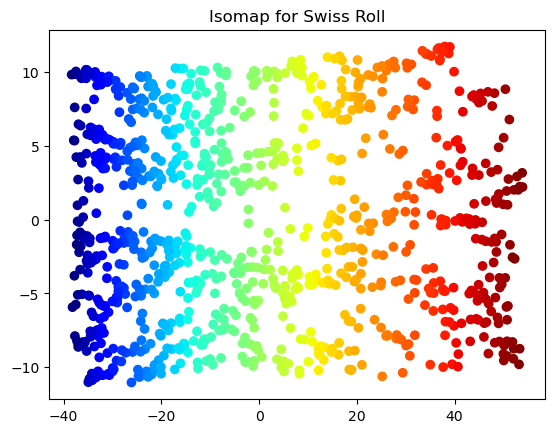

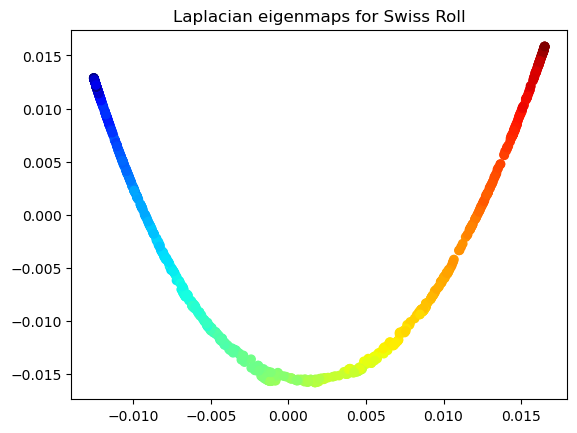

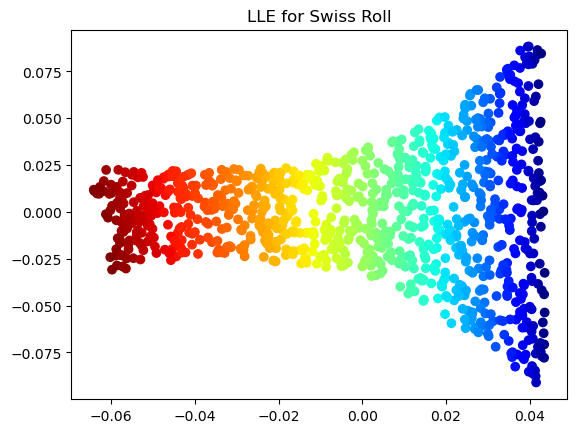

In [89]:
X_swiss_roll, y_swiss_roll = make_swiss_roll(n_samples=1000, random_state=0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=y_swiss_roll, cmap='jet')
ax.set_title('Swiss Roll')
plt.show()

n_neighbors = 10
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X_swiss_roll)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('Isomap for Swiss Roll')
plt.show()

laplacian = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_lap = laplacian.fit_transform(X_swiss_roll)
plt.scatter(X_lap[:, 0], X_lap[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('Laplacian eigenmaps for Swiss Roll')
plt.show()

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X_swiss_roll)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('LLE for Swiss Roll')
plt.show()